In [1047]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.cluster import KMeans

def getDf(name, start, end, interval):
    ticker = yfinance.Ticker(name)
    df = ticker.history(interval=interval, start= start, end= end)

    df['Date'] = pd.to_datetime(df.index)
    df['Date'] = df['Date'].apply(mpl_dates.date2num)
    
    df['DateStr'] = df.index
    df['DateStr'] = df['DateStr'].apply(str)
    df['DateStr'] = df['DateStr'].str[5:-9]

    df['Id'] = range(0, len(df))
    df.set_index('Id', inplace=True)
    return df

def isSupport(df, i, scale):
    support = df['Low'][i] < df['Low'][i-scale]  and df['Low'][i] < df['Low'][i+scale] and df['Low'][i+scale] < df['Low'][i+2*scale] and df['Low'][i-scale] < df['Low'][i-2*scale]
    return support

def isResistance(df, i, scale):
    resistance = df['High'][i] > df['High'][i-scale]  and df['High'][i] > df['High'][i+scale] and df['High'][i+scale] > df['High'][i+2*scale] and df['High'][i-scale] > df['High'][i-2*scale]
    return resistance

def getLevel(df, scale):
    df['Support'], df['Resistance'] = None, None
    
    for i in range(scale*2, df.shape[0]-scale*2):
        if isSupport(df, i, scale): df['Support'][i] = df['Low'][i]  #round(df['Low'][i], 2) )
        if isResistance(df, i, scale): df['Resistance'][i] = df['High'][i] #  round(df['High'][i], 2)  
            
    return df

In [1048]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=10)
plt.tight_layout()

def getPlot(df, mode):
    # make figure + axes
    fig, ax = plt.subplots(tight_layout=True)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
                  
    xs = df.index
    ys = df['Open']
    ys_mark = df[mode]

    # 'bo-' means blue color, round points, solid lines
    ax.plot(xs, ys, 'g-', ys_mark,'bo-')

    # zip joins x and y coordinates in pairs
    for x, y in zip(xs, ys_mark):
        if not y: continue
        label = df['DateStr'][x] + "\n${:.2f}".format(y) + "\n" + str(df['Volume'][x])
        ax.annotate(label, # this is the text
                     (x, y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

    plt.show()

<Figure size 864x504 with 0 Axes>

In [1049]:
def getKmeans(df, mode):
    dfLevels = df [ df[mode] > 0 ]    
#     dfLevels = dfLevels[['Volume', 'Support', 'Date']]
    dfLevels = dfLevels[[mode, 'Date']]
    kmeans = KMeans(n_clusters=3, random_state=0).fit(dfLevels)
#     kmeans = KMeans(random_state=3).fit(dfLevels)
    predict = kmeans.labels_
    return predict

/var/folders/nd/5pqh5k_9627gj29t_mn4n73m0000gn/T/ipykernel_13636/1173153707.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if isResistance(df, i, scale): df['Resistance'][i] = df['High'][i] #  round(df['High'][i], 2)
/var/folders/nd/5pqh5k_9627gj29t_mn4n73m0000gn/T/ipykernel_13636/1173153707.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if isSupport(df, i, scale): df['Support'][i] = df['Low'][i]  #round(df['Low'][i], 2) )


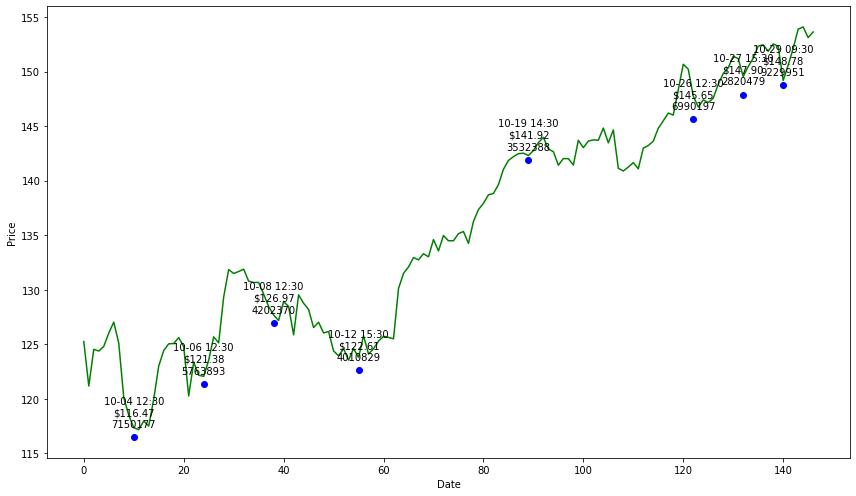

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,DateStr,Support,Resistance
Id,,,,,,,,,,,
0,125.250000,125.860001,120.959999,121.180000,15299883,0,0,18901.562500,10-01 09:30,None,None
1,121.169998,124.510002,120.839996,124.029999,10294651,0,0,18901.604167,10-01 10:30,None,None
2,124.535004,125.169998,123.669998,124.370003,6288186,0,0,18901.645833,10-01 11:30,None,None
3,124.379997,125.126900,123.610001,124.769997,4406755,0,0,18901.687500,10-01 12:30,None,None
4,124.800003,126.345001,124.790001,126.035004,4965079,0,0,18901.729167,10-01 13:30,None,None


In [1050]:
name = "TQQQ"
start="2021-10-01"
# end="2021-09-30"
end =None
scale = 1
df = getDf(name, start, end, '1h')
df = getLevel(df, scale)
getPlot(df, "Support")
df.head()

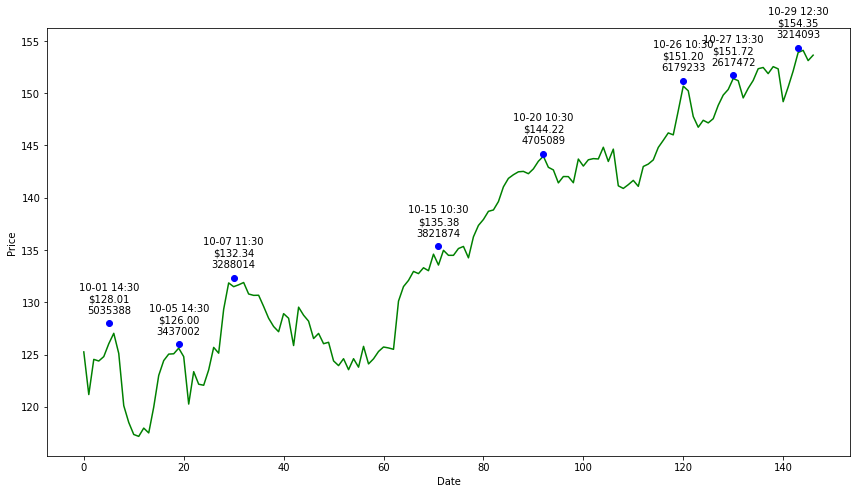

In [1051]:
getPlot(df, "Resistance")

In [1052]:
predict = getKmeans(df, "Support")
predict

array([1, 1, 1, 1, 0, 2, 2, 2], dtype=int32)

/var/folders/nd/5pqh5k_9627gj29t_mn4n73m0000gn/T/ipykernel_13636/1173153707.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if isResistance(df, i, scale): df['Resistance'][i] = df['High'][i] #  round(df['High'][i], 2)
/var/folders/nd/5pqh5k_9627gj29t_mn4n73m0000gn/T/ipykernel_13636/1173153707.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if isSupport(df, i, scale): df['Support'][i] = df['Low'][i]  #round(df['Low'][i], 2) )


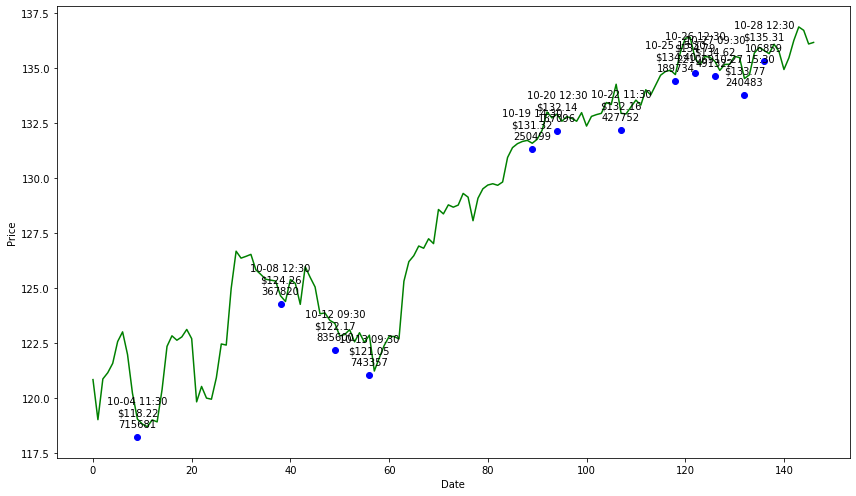

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,DateStr,Support,Resistance
Id,,,,,,,,,,,
0,120.839996,121.209999,118.790001,119.040001,1842773,0,0,18901.562500,10-01 09:30,None,None
1,119.019997,120.860001,118.800003,120.570000,878324,0,0,18901.604167,10-01 10:30,None,None
2,120.870003,121.480003,120.669998,121.180000,521383,0,0,18901.645833,10-01 11:30,None,None
3,121.154999,121.680000,120.879997,121.540001,338677,0,0,18901.687500,10-01 12:30,None,None
4,121.580002,122.730003,121.559998,122.570000,488627,0,0,18901.729167,10-01 13:30,None,None


In [1053]:
name = "SSO"
start="2021-10-01"
end= None
scale = 1
df = getDf(name, start, end, '1h')
df = getLevel(df, scale)
getPlot(df, "Support")
df.head()

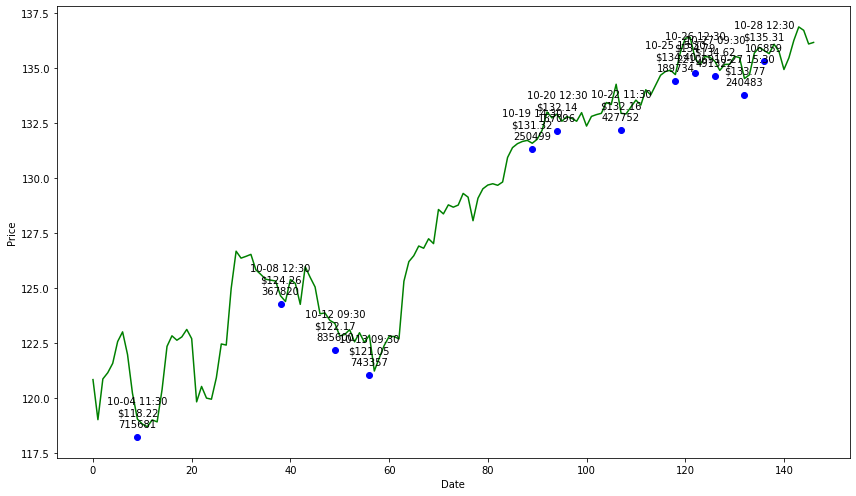

In [1054]:
getPlot(df, "Support")

In [1055]:
predict = getKmeans(df, "Resistance")
predict

array([2, 2, 2, 1, 1, 0, 0, 0, 0], dtype=int32)

/var/folders/nd/5pqh5k_9627gj29t_mn4n73m0000gn/T/ipykernel_13636/1173153707.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if isSupport(df, i, scale): df['Support'][i] = df['Low'][i]  #round(df['Low'][i], 2) )
/var/folders/nd/5pqh5k_9627gj29t_mn4n73m0000gn/T/ipykernel_13636/1173153707.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if isResistance(df, i, scale): df['Resistance'][i] = df['High'][i] #  round(df['High'][i], 2)


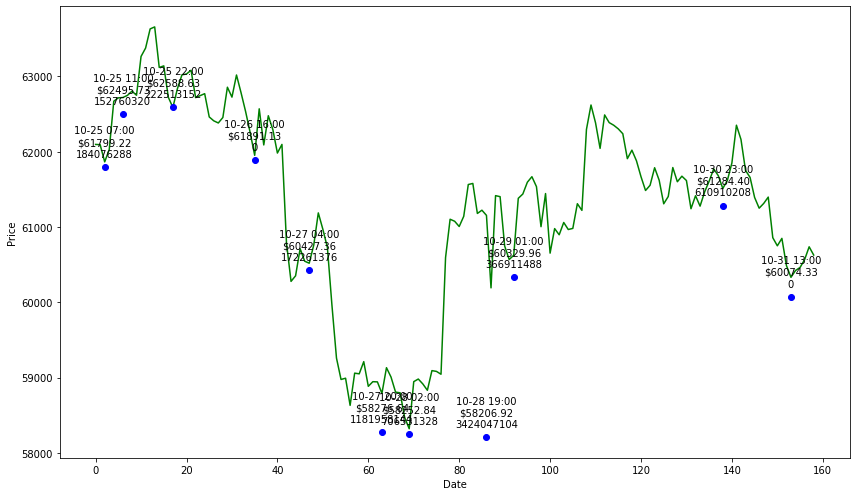

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,DateStr,Support,Resistance
Id,,,,,,,,,,,
0,62097.468750,62191.410156,61877.777344,62051.785156,0,0,0,18925.166667,10-25 05:00,None,None
1,62093.855469,62135.898438,61863.074219,61868.773438,185231360,0,0,18925.208333,10-25 06:00,None,None
2,61865.562500,62054.167969,61799.218750,62032.933594,184076288,0,0,18925.250000,10-25 07:00,61799.21875,None
3,62029.312500,62858.214844,61965.871094,62706.824219,1049636864,0,0,18925.291667,10-25 08:00,None,None
4,62671.429688,62950.828125,62671.429688,62740.207031,1572216832,0,0,18925.333333,10-25 09:00,None,62950.828125


In [1059]:
name = "BTC-USD"
start="2021-10-25"
end= None
scale = 1
df = getDf(name, start, end, '1h')
df = getLevel(df, scale)
getPlot(df, "Support")
df.head()